#Домашнее задание № 13

#Алгоритмы кластеризации



In [1]:
# установим библиотеку
!pip install opencv-python

In [2]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

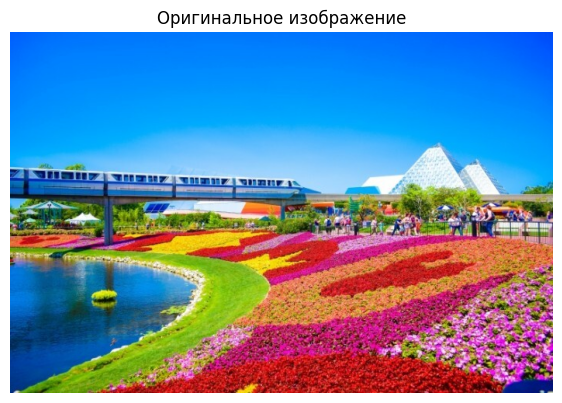

In [3]:
# посмотрим на нашу картинку
img = cv2.imread('/content/feml.jpeg')
draw_picture(img, 'Оригинальное изображение', bgr=True)

#2. Реализуем 3 модели кластеризации

In [32]:
type(img)

numpy.ndarray

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [4]:
# загрузим библиотеки
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# посмотрим размер нашего изображения
img.shape

(466, 700, 3)

In [6]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

K=2

In [7]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [8]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [9]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [10]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[ 73.67593551, 102.18392533, 163.59789238],
       [235.00670464, 145.45064236,  33.27622894]])

In [11]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [12]:
# проверим размер
output_image.shape

(466, 700, 3)

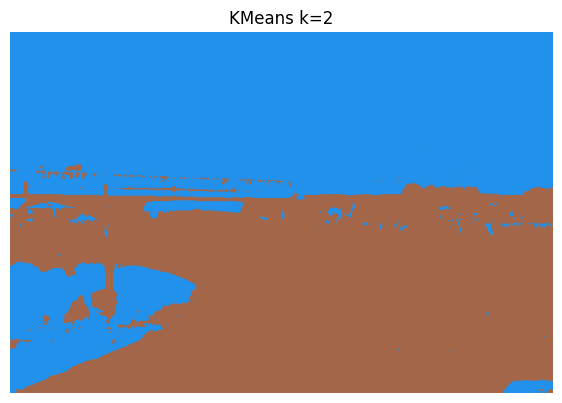

In [13]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

k=5

In [14]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=original_image, reshaped_img=reshaped_img, k=2):

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return

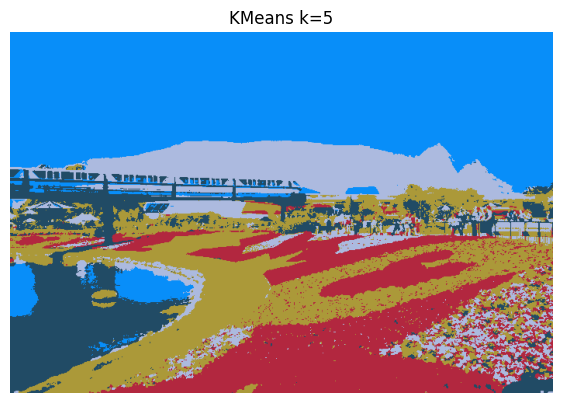

In [15]:
# посмотрим
KM_k(k=5)

k=10

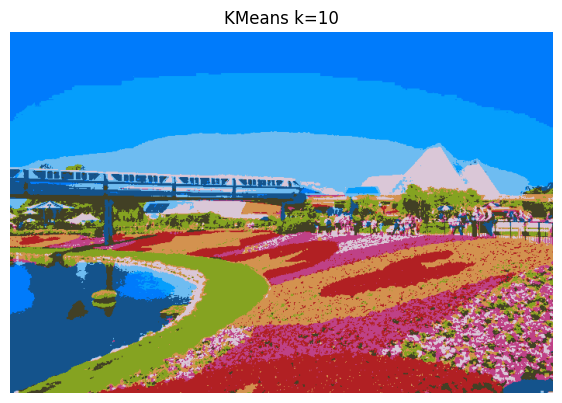

In [16]:
# посмотрим
KM_k(k=10)

k=20

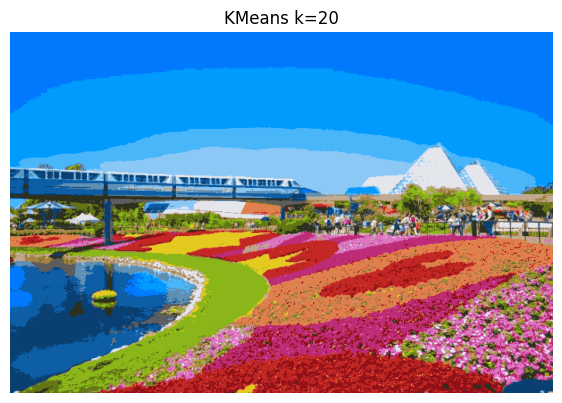

In [17]:
# посмотрим
KM_k(k=20)

b) DBSCAN

In [20]:
from PIL import Image
import os

In [21]:
image = Image.open('/content/feml.jpeg')
image.size

In [23]:
a, b = image.size

In [25]:
new_size = (a//4, b//4)
new_size

(175, 116)

In [34]:
image_4 = image.resize(new_size)
img_4 = np.array(image_4)

array([[[  0,  93, 254],
        [  0,  95, 254],
        [  0,  95, 253],
        ...,
        [  0,  76, 248],
        [  0,  75, 247],
        [  0,  73, 246]],

       [[  0,  95, 254],
        [  0,  97, 254],
        [  0,  97, 254],
        ...,
        [  1,  78, 249],
        [  1,  77, 249],
        [  0,  75, 248]],

       [[  0,  98, 253],
        [  0,  99, 254],
        [  0, 100, 254],
        ...,
        [  1,  79, 250],
        [  1,  79, 250],
        [  1,  78, 249]],

       ...,

       [[  2,  52, 128],
        [  0,  53, 137],
        [  1,  53, 136],
        ...,
        [  1,  21, 123],
        [  3,  19, 117],
        [  2,  17, 125]],

       [[  1,  53, 127],
        [  3,  49, 127],
        [  9,  52, 118],
        ...,
        [  4,  22, 126],
        [  0,  21, 120],
        [  0,  18, 115]],

       [[  2,  46, 127],
        [ 87, 114, 162],
        [144, 165, 151],
        ...,
        [ 21,  51, 131],
        [ 60,  76, 126],
        [ 98, 108, 129]]], dtype=uint8)
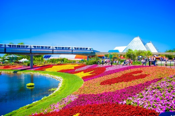

In [35]:
img_4

In [36]:
reshaped_img_4 = np.reshape(img_4,
	                          ((img_4.shape[0] * img_4.shape[1]),
                            3)
                           )
reshaped_img_4

array([[  0,  93, 254],
       [  0,  95, 254],
       [  0,  95, 253],
       ...,
       [ 21,  51, 131],
       [ 60,  76, 126],
       [ 98, 108, 129]], dtype=uint8)

In [37]:
from sklearn.cluster import DBSCAN
import cv2

In [111]:
# Создим объект DBSCAN
dbscan = DBSCAN(eps=2, min_samples=15)

In [112]:
# обучим модель
dbscan.fit(reshaped_img_4)
dbscan

DBSCAN(eps=2, min_samples=15)

In [113]:
# Получим предсказания
labels = dbscan.fit_predict(reshaped_img_4)
myset = set(labels)
len(myset)

7

In [94]:
labels_ = dbscan.labels_
myset = set(labels_)
myset

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53}

In [ ]:
labels_ = dbscan.labels_
len(labels_)

In [ ]:
unique_elements = np.unique(labels)
unique_elements

In [ ]:
len(unique_elements)

In [ ]:
segmented_img = labels.reshape(img.shape[:2])
segmented_img

In [ ]:
len(ans)

In [ ]:
listlab=list(set(ans))

In [ ]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3

In [ ]:
draw_picture(output_image, 'DBSCAN(eps=3, min_samples=10)', bgr=True)

c) AgglomerativeClustering. Число кластеров K = 2, 5, 10, 20.